In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Imputer
#from sklearn.preprocessing import Imputer

from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn_pandas import DataFrameMapper
# from feature_engine.imputation import CategoricalImputer

In [2]:
# # prompt: mount code

# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
data = pd.read_csv(r"C:\Users\uday\Music\ITML12-SMS\DATASET\12.SPAMVSHAM_SMS.csv")

In [4]:
data

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."
...,...,...
4453,ham,Living is very simple.. Loving is also simple....
4454,ham,Msgs r not time pass.They silently say that I ...
4455,ham,What is this 'hex' place you talk of? Explain!
4456,ham,"Sorry, I'll call later"


In [5]:
data.shape

(4458, 2)

In [6]:
#Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      4458 non-null   object
 1   v2      4458 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB


In [7]:
#Check the missing values in the data
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
data['v1'].value_counts()

v1
ham     3868
spam     590
Name: count, dtype: int64

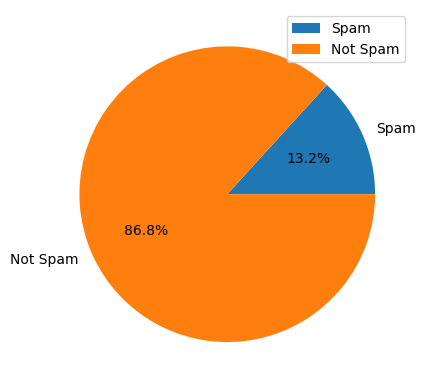

In [9]:
ns = data['v1'].isin(['ham']).sum(axis=0)
s = data['v1'].isin(['spam']).sum(axis=0)

label=['Spam','Not Spam']
a = [s,ns]
plt.pie(x=a,labels=label,autopct='%1.1f%%')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

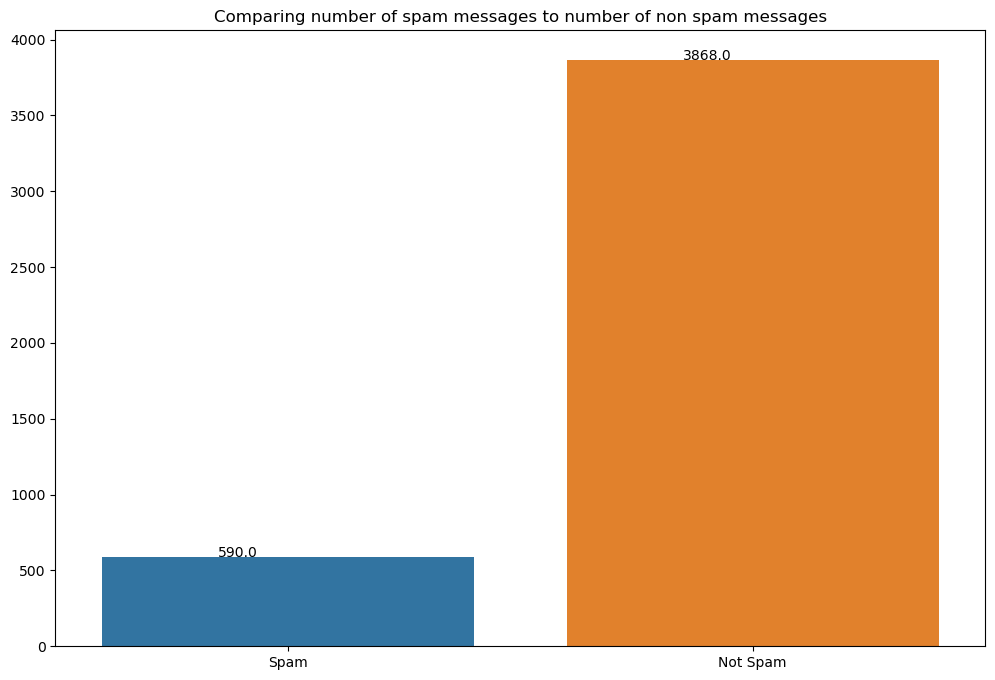

In [10]:
plt.figure(figsize=(12,8))
ax =sns.barplot(x=label,y=a)
plt.title('Comparing number of spam messages to number of non spam messages')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (x +0.25, y + height + 0.8))
plt.show

In [11]:
#pip install --user wordcloud


In [12]:
import wordcloud
print(wordcloud.__version__)

1.9.3


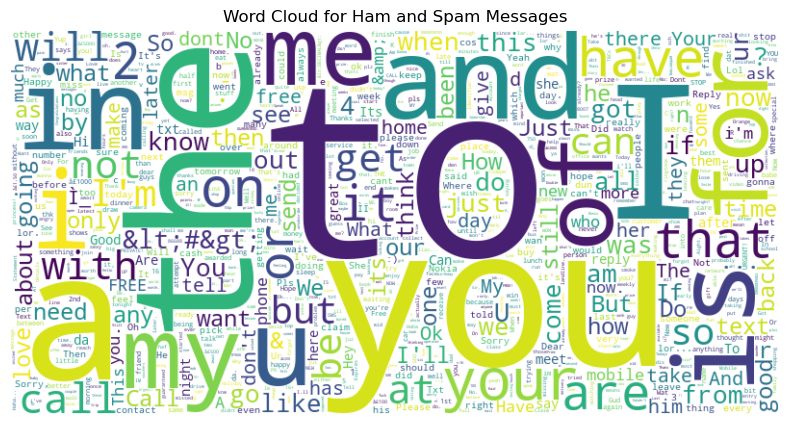

In [13]:
from collections import Counter
from wordcloud import WordCloud

# Tokenize the text into words
words = ' '.join(data['v2']).split()

# Count word frequencies
word_freq = Counter(words)

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, max_words=2500, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham and Spam Messages')
plt.show()


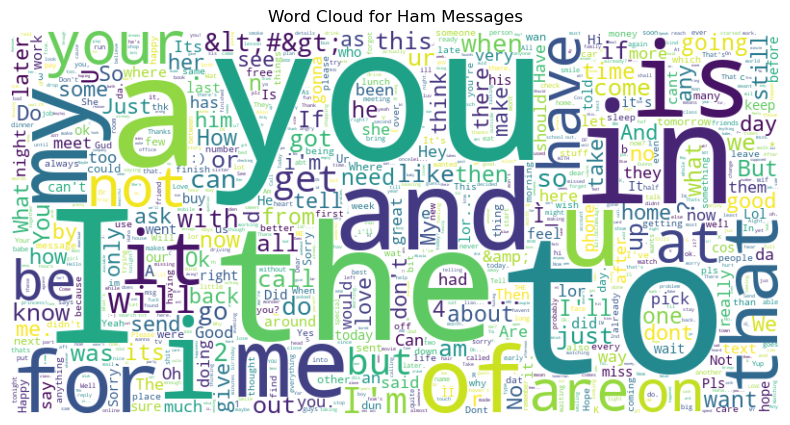

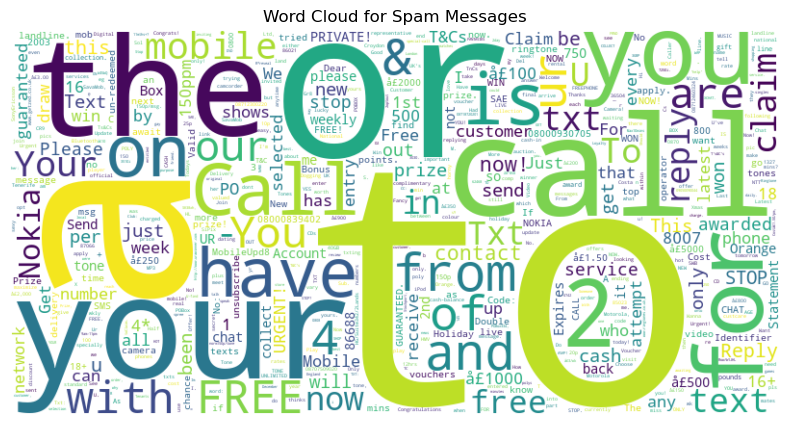

In [14]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter words for 'ham' class
ham_words = ' '.join(data[data['v1'] == 'ham']['v2']).split()
ham_word_freq = Counter(ham_words)

# Generate word cloud for 'ham' class
ham_wordcloud = WordCloud(width=800, height=400, max_words=2500, background_color='white').generate_from_frequencies(ham_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

# Filter words for 'spam' class
spam_words = ' '.join(data[data['v1'] == 'spam']['v2']).split()
spam_word_freq = Counter(spam_words)

# Generate word cloud for 'spam' class
spam_wordcloud = WordCloud(width=800, height=400, max_words=2500, background_color='white').generate_from_frequencies(spam_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

In [15]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['v1']== 'ham']
df_minority = data[data['v1']== 'spam']

# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=3500,random_state=123)
df_majority_downsampled = resample(df_majority, replace=True,n_samples=3500,random_state=123)

# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority_downsampled])

# Display new class counts
df_upsampled['v1'].value_counts()

v1
spam    3500
ham     3500
Name: count, dtype: int64

In [16]:
# shuffle the DataFrame rows
data= df_upsampled.sample(frac = 1)

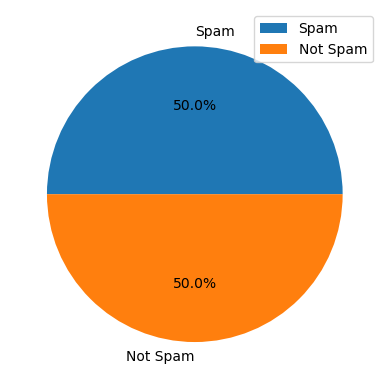

In [17]:
ns = data['v1'].isin(['ham']).sum(axis=0)
s = data['v1'].isin(['spam']).sum(axis=0)

label=['Spam','Not Spam']
a = [s,ns]
plt.pie(x=a,labels=label,autopct='%1.1f%%')
plt.legend()
plt.show()

In [18]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
data['v2'].head(5)

1545    network operator. The service is free. For T &...
522         There are many company. Tell me the language.
3151    URGENT! We are trying to contact you. Last wee...
3934    Hard LIVE 121 chat just 60p/min. Choose your g...
3599    Just sent again. Do you scream and moan in bed...
Name: v2, dtype: object

In [21]:

print("printing some random reviews")
print(7, data['v2'].values[7])
print(234, data['v2'].values[234])
print(17, data['v2'].values[17])

printing some random reviews
7 Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p
234 You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327. T&C: RSTM, SW7 3SS. 150ppm
17 BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu


In [22]:
# remove punctuation
import re
import string

def remove_punc(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data['v2'] = data['v2'].apply(lambda x: remove_punc(x))

In [23]:
data['v2'].head()

1545    network operator The service is free For T  Cs...
522           There are many company Tell me the language
3151    URGENT We are trying to contact you Last weeke...
3934    Hard LIVE  chat just  Choose your girl and con...
3599    Just sent again Do you scream and moan in bed ...
Name: v2, dtype: object

In [24]:
import nltk
from nltk.corpus import stopwords
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uday\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
def data_cleaner(text, use_stemming=True, use_lemmatization=True):
    # Convert to lowercase
    lower_case = text.lower()

    # Tokenize the text
    tokens = word_tokenize(lower_case)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    if use_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    if use_lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(tokens).strip()


In [26]:
# Apply the data_cleaner function to the 'text_column' using lambda function
data['v2'] =data['v2'].apply(lambda x: data_cleaner(x, use_stemming=True, use_lemmatization=False))

In [27]:
data['v2'].head()

1545                    network oper servic free cs visit
522                             mani compani tell languag
3151    urgent tri contact last weekend draw show å£ p...
3934    hard live chat choos girl connect live call ch...
3599                        sent scream moan bed princess
Name: v2, dtype: object

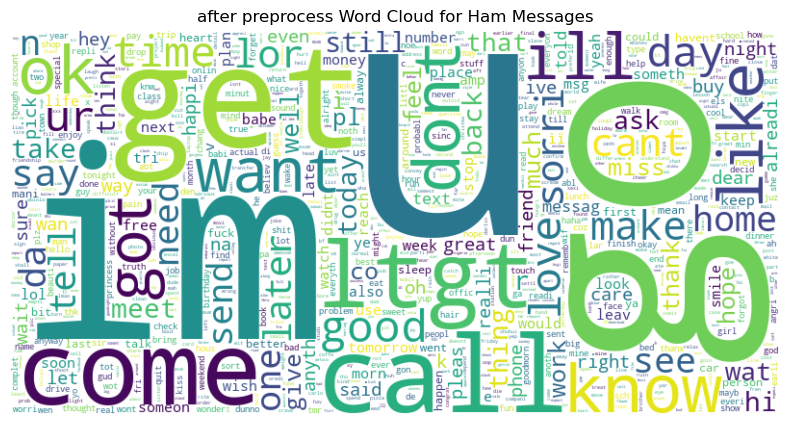

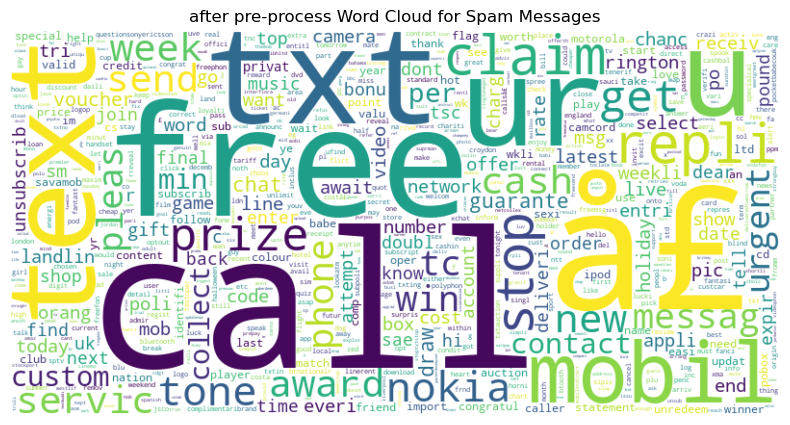

In [28]:
# Filter words for 'ham' class
ham_words = ' '.join(data[data['v1'] == 'ham']['v2']).split()
ham_word_freq = Counter(ham_words)

# Generate word cloud for 'ham' class
ham_wordcloud = WordCloud(width=800, height=400, max_words=2500, background_color='white').generate_from_frequencies(ham_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('after preprocess Word Cloud for Ham Messages')
plt.show()

# Filter words for 'spam' class
spam_words = ' '.join(data[data['v1'] == 'spam']['v2']).split()
spam_word_freq = Counter(spam_words)

# Generate word cloud for 'spam' class
spam_wordcloud = WordCloud(width=800, height=400, max_words=2500, background_color='white').generate_from_frequencies(spam_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('after pre-process Word Cloud for Spam Messages')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
data['v1'].value_counts()

v1
spam    3500
ham     3500
Name: count, dtype: int64

In [31]:
le = LabelEncoder()
y = le.fit_transform(data['v1'])
y = np.array(y)

In [32]:
# Print the class names associated with label encoding
class_names = le.classes_
print("Class Names:", class_names)

Class Names: ['ham' 'spam']


In [33]:
y

array([1, 0, 1, ..., 1, 0, 0])

In [34]:
x=data['v2']

In [35]:
x

1545                    network oper servic free cs visit
522                             mani compani tell languag
3151    urgent tri contact last weekend draw show å£ p...
3934    hard live chat choos girl connect live call ch...
3599                        sent scream moan bed princess
                              ...                        
993     broke list reason nobodi town cant tell she sa...
34      free top rington sub weekli ringtoneget week f...
962     great new offer doubl min doubl txt best orang...
2924    feb ltgt love u day send di ur valu frnd evn c...
2575                                  im gon na rip uteru
Name: v2, Length: 7000, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y ,random_state=42)

In [37]:
X_train.shape,y_train.shape

((4900,), (4900,))

In [38]:
 X_test.shape,y_test.shape

((2100,), (2100,))

## Featuraization:- TF-IDF

In [39]:
import pickle
from sklearn import preprocessing

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tfidf.fit(X_train)
# import pickle
# filename = r'C:\Users\ST-0006\Documents\dont touch\SMS\tfidf.pkl'
# pickle.dump(tfidf, open(filename, 'wb'))# fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf =tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Normalize Data
X_train_tfidf = preprocessing.normalize(X_train_tfidf)
print("Train Data Size: ",X_train_tfidf.shape)

#Normalize Data
X_test_tfidf = preprocessing.normalize(X_test_tfidf)
print("Test Data Size: ",X_test_tfidf.shape)

Train Data Size:  (4900, 1601)
Test Data Size:  (2100, 1601)


### Random Forest with TF-IDF

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train_tfidf,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

optimal n_estimators 80
optimal max_depth 500


AUC on Test data is 0.9947619047619047
AUC on Train data is 0.9973469387755102
---------------------------


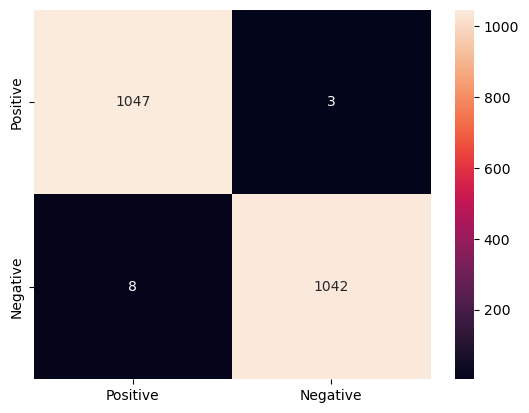

In [41]:
from sklearn.metrics import accuracy_score
#training our model for max_depth=100,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train_tfidf,y_train)

# import pickle
# filename = r'C:\Users\ST-0006\Documents\dont touch\SMS\sms_RF_tfidf.pkl'
# pickle.dump(clf, open(filename, 'wb'))

pred_test =clf.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = clf.predict(X_train_tfidf)
train_accuracy =accuracy_score(y_train,pred_train)



print("AUC on Test data is " +str(accuracy_score(y_test,pred_test)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['Positive','Negative']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [42]:
original =  ['spam' if x==1 else 'ham' for x in y_test[:20]]
predicted = clf.predict(X_test_tfidf[:20])
pred = []

for i in predicted:
  if i == 1:
    k = 'spam'
    pred.append(k)
  else:
    k = 'ham'
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)),
               columns =['Text','original_Classlabel', 'predicted_classlebel'])
df

,Text,original_Classlabel,predicted_classlebel
0,romcapspam everyon around respond well presenc...,spam,spam
1,heygreat dealfarm tour deposit may,ham,ham
2,want anytim network min text new video phone f...,spam,spam
3,hmv bonu special pound genuin hmv voucher answ...,spam,spam
4,let make saturday monday per conveni,ham,ham
5,warner villag c colin farrel swat wkend warner...,spam,spam
6,win year suppli cd store ur choic worth å£ ent...,spam,spam
7,youv tkt cup final å£ cash collect call pobox,spam,spam
8,privat account statement show unredeem point c...,spam,spam
9,want latest video handset anytim network min h...,spam,spam


In [43]:
all_model_result = pd.DataFrame(columns=['METHOD', 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])
new = ['TFIDF ','Random forest-Classifier',99, 98]
all_model_result.loc[0] = new

### STOCHASTIC GRADIENT DESCENT

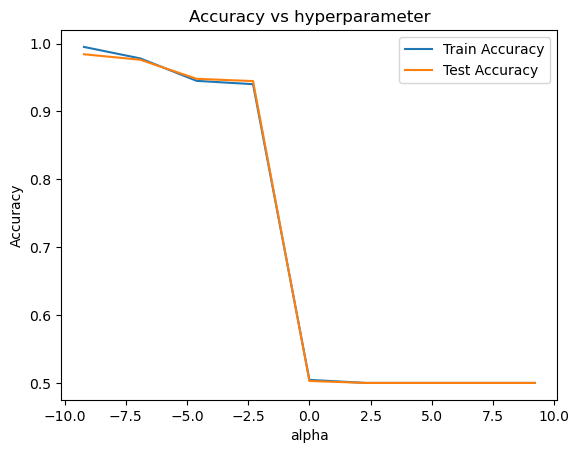

optimal alpha for which auc is maximum :  0.0001


In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
test_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge")

    model.fit(X_train_tfidf,y_train)
    prob_cv = model.predict(X_test_tfidf)
    test_auc.append(accuracy_score(y_test,prob_cv))
    prob_train = model.predict(X_train_tfidf)
    train_auc.append(accuracy_score(y_train,prob_train))
optimal_alpha= alpha[test_auc.index(max(test_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='Train Accuracy')
x.plot(alpha, test_auc, label='Test Accuracy')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

AUC on Test data is 0.9852380952380952
AUC on Train data is 0.9953061224489796
---------------------------


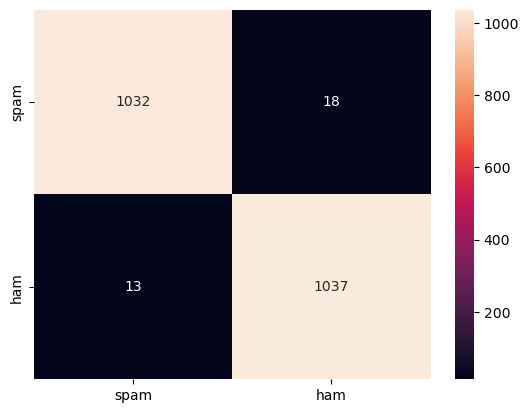

In [45]:
#Testing AUC on Test data
svm = SGDClassifier(alpha=optimal_alpha)

svm.fit(X_train_tfidf,y_train)

# filename = r'C:\Users\ST-0006\Documents\dont touch\SMS\sms_svm_tfidf.pkl'
# pickle.dump(svm, open(filename, 'wb'))

pred_test = svm.predict(X_test_tfidf)
test_accuracy_ = accuracy_score(y_test, pred_test)
pred_train = svm.predict(X_train_tfidf)
train_accuracy= accuracy_score(y_train,pred_train)




print("AUC on Test data is " +str(accuracy_score(y_test,pred_test)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['spam','ham']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [46]:
original =  ['spam' if x==1 else 'ham' for x in y_test[:20]]
predicted = svm.predict(X_test_tfidf[:20])
pred = []

for i in predicted:
  if i == 1:
    k = 'spam'
    pred.append(k)
  else:
    k = 'ham'
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)),
               columns =['Text','original_Classlabel', 'predicted_classlebel'])
df

,Text,original_Classlabel,predicted_classlebel
0,romcapspam everyon around respond well presenc...,spam,spam
1,heygreat dealfarm tour deposit may,ham,ham
2,want anytim network min text new video phone f...,spam,spam
3,hmv bonu special pound genuin hmv voucher answ...,spam,spam
4,let make saturday monday per conveni,ham,ham
5,warner villag c colin farrel swat wkend warner...,spam,spam
6,win year suppli cd store ur choic worth å£ ent...,spam,spam
7,youv tkt cup final å£ cash collect call pobox,spam,spam
8,privat account statement show unredeem point c...,spam,spam
9,want latest video handset anytim network min h...,spam,spam


In [47]:
new = ['TFIDF ','SGD classifier',test_accuracy*100, test_accuracy_*100]
all_model_result.loc[1] = new

In [48]:
all_model_result

,METHOD,Classifier,Train-Accuracy,Test-Accuracy
0,TFIDF,Random forest-Classifier,99.00000,98.00000
1,TFIDF,SGD classifier,99.47619,98.52381


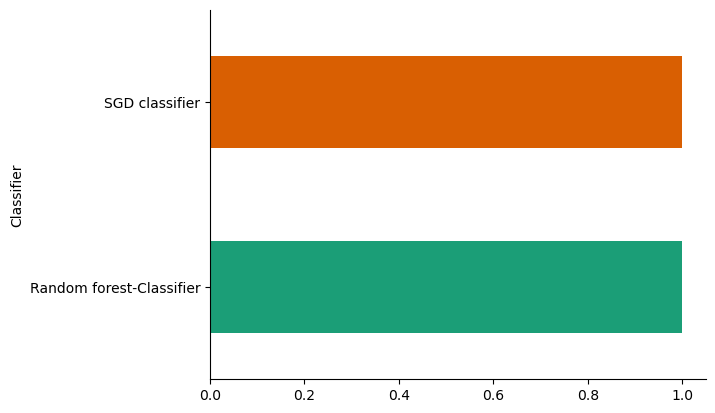

In [49]:
# @title Classifier

from matplotlib import pyplot as plt
import seaborn as sns
all_model_result.groupby('Classifier').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## LSTM

In [50]:
from keras.layers import LSTM, Dense, Embedding, MaxPooling1D, Conv1D, Dropout, SpatialDropout1D

In [51]:
#pip install tensorflow

In [52]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
#import tensorflow as t
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=X_train_tfidf.shape[1], output_dim=100, input_length=X_train_tfidf.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
X_train_tfidf.shape[1]

1601

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1601, 100)         160100    
                                                                 
 spatial_dropout1d (Spatial  (None, 1601, 100)         0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 277477 (1.06 MB)
Trainable params: 277477 (1.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
import tensorflow as tf
# Convert sparse matrices to SparseTensor
def sparse_matrix_to_sparse_tensor(sparse_matrix):
    coo = sparse_matrix.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.sparse.SparseTensor(indices, coo.data, coo.shape))

X_train_sparse_tensor = sparse_matrix_to_sparse_tensor(X_train_tfidf)
X_test_sparse_tensor = sparse_matrix_to_sparse_tensor(X_test_tfidf)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=X_train_sparse_tensor.shape[1], output_dim=100, input_length=X_train_sparse_tensor.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 50

model.fit(X_train_sparse_tensor, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_sparse_tensor, y_test))

Epoch 1/50


77/77 [==============================] - 866s 11s/step - loss: 0.6938 - accuracy: 0.5080 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/50
77/77 [==============================] - 1534s 20s/step - loss: 0.6935 - accuracy: 0.4912 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
77/77 [==============================] - 1655s 22s/step - loss: 0.6936 - accuracy: 0.4935 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/50
77/77 [==============================] - 1236s 16s/step - loss: 0.6935 - accuracy: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
77/77 [==============================] - 941s 12s/step - loss: 0.6931 - accuracy: 0.5122 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 6/50
77/77 [==============================] - 940s 12s/step - loss: 0.6937 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
77/77 [==============================] - 946s 12s/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.5005
E

In [56]:
# prompt: evalute the model

# Evaluate the model
loss, accuracy = model.evaluate(X_test_sparse_tensor, y_test, verbose=0)
print("Accuracy:", accuracy)


Accuracy: 0.5442857146263123


In [57]:
#model.save('/content/drive/MyDrive/variables/sms_lstm.h5')

In [58]:
new = ['LSTM ',' LSTM Classifier',1*100,accuracy*100]
all_model_result.loc[3] = new

In [59]:
all_model_result

,METHOD,Classifier,Train-Accuracy,Test-Accuracy
0,TFIDF,Random forest-Classifier,99.00000,98.000000
1,TFIDF,SGD classifier,99.47619,98.523810
3,LSTM,LSTM Classifier,100.00000,54.428571


## BERT

In [ ]:
!pip3 install --quiet tensorflow_text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTEN
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
preprocessed_text

In [ ]:
text_input

In [ ]:

model.summary()

In [ ]:

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:

history=model.fit(X_train, y_train, epochs=15)

In [ ]:

score=model.evaluate(X_test, y_test)

In [ ]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
print('Test accuracy:', score[1])

In [ ]:
model.save('/content/drive/MyDrive/variables/sms_bert.h5')

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
new = ['BERT ','BERT classifier',test*100, score[1]*100]
all_model_result.loc[2] = new

In [ ]:
all_model_result

In [ ]:
#model.save_model("/content/drive/MyDrive/variables/sms_bert1.h5")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
from sklearn.metrics import accuracy_score

test=accuracy_score(y_test, y_predicted)


In [ ]:
test

In [ ]:
new = ['BERT ','BERT classifier',test*100, score[1]*100]
all_model_result.loc[2] = new

In [ ]:
all_model_result

In [ ]:
import pickle
filename = '/content/drive/MyDrive/variables/sms_ber.pkl'
pickle.dump(model, open(filename, 'wb'))